In this example, we consider a nanobar with dimensions 60nm x 10nm x 5 nm
We used this example to demostrate how to obtain the magnetization distribution using MicroMagnetic.jl
We first import MicroMagnetic and CairoMakie for plotting.

In [1]:
using MicroMagnetic
using CairoMakie

We create a FDMesh

In [2]:
mesh = FDMesh(; dx=2e-9, dy=2e-9, dz=2.5e-9, nx=30, ny=5, nz=2);

We create a Sim wth `SD` driver using `Sim` function and set the saturation magnetization Ms

In [3]:
sim = Sim(mesh; driver="SD")
set_Ms(sim, 8e5)   #Set saturation magnetization Ms=8e5 A/m

[ Info: MicroSim has been created.


true

We consider two energies (i.e., exchange and demag) with exchange constant A = 1e-12 J/m.

In [4]:
add_exch(sim, 1e-12);  #Add exchange interaction
add_demag(sim);         #Add demagnetization

[ Info: Exchange has been added.


Initilize the magnetization to (1,1,0) direction,

In [5]:
init_m0(sim, (1, 1, 0))  #Initialize magnetization

true

We can plot the magnetization using `plot_m` function

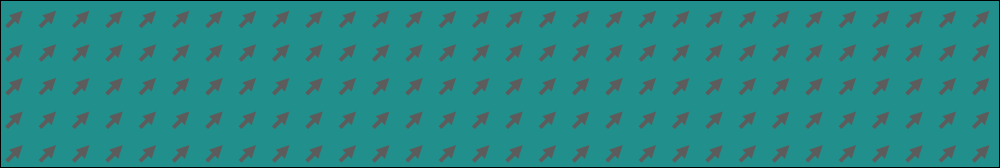

In [6]:
plot_m(sim)

We relax the system to obtain the magnetization distribution. The stopping criteria is the stopping_dmdt,
typically its value should be in the rangle of [0.01, 1].

In [7]:
relax(sim; max_steps=2000, stopping_dmdt=0.01)

[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.01 @steps=88, Done!


We plot the magnetization again

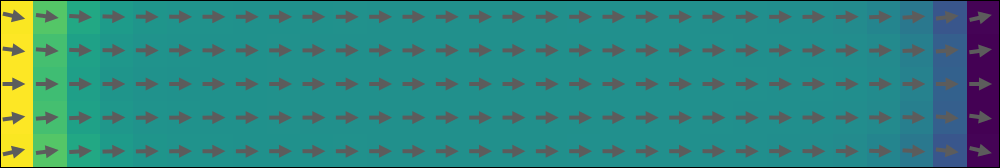

In [8]:
fig = plot_m(sim)

We save the figure to png.

In [9]:
save("bar.png", fig)

CairoMakie.Screen{IMAGE}


Save the magnetization state for later postprocessing, which can be visualization using Paraview (https://www.paraview.org/)

In [10]:
save_vtk(sim, "bar"; fields=["exch", "demag"])

1-element Vector{String}:
 "bar.vts"

## Using the sim_with function.
We can use sim_with to simplify the setup of the simulation.
We put all the parameters together:

In [11]:
args = (
    task = "Relax",
    mesh = FDMesh(dx=2e-9, dy=2e-9, dz=2.5e-9, nx=30, ny=5, nz=2),
    Ms = 8e5,
    A = 1e-12,
    demag = true,
    m0 = (1, 1, 0),
    stopping_dmdt = 0.01
);

then use the sim_with function

In [12]:
sim = sim_with(args);

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.01 @steps=88, Done!


We plot the magnetization

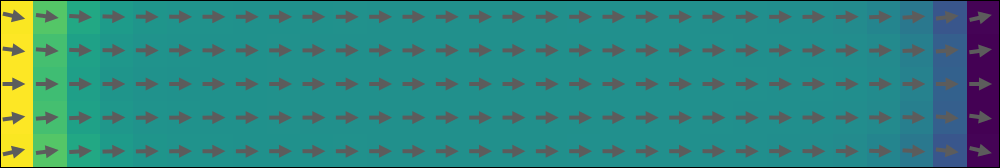

In [13]:
plot_m(sim)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*